# Libaray Definition 


In [1]:
#define the Library 
from tkinter.ttk import Style
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 

%matplotlib inline
sns.set()

# Data Set and information 

In [2]:
Data_Fuel = pd.read_csv('FuelConsumptionCo2.csv')
Data_Fuel.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Information of DataSet :
### TRANSMISSION
- A = automatic
- AM = automated manual
- AS = automatic with select shift
- AV = continuously variable
- M = manual
- 3 – 10 = Number of gears

### Fuel type:
- X = regular gasoline
- Z = premium gasoline
- D = diesel
- E = ethanol (E85)
- N = natural gas

### Fuel consumption: 
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

### CO2 emissions: 
the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

In [3]:
#Check the duplicate record 
Data_Fuel.duplicated().any()

True

In [4]:
Data_Fuel.drop_duplicates(inplace=True)
Data_Fuel.duplicated().sum()

0

<AxesSubplot:title={'center':'the Fuel consuption '}>

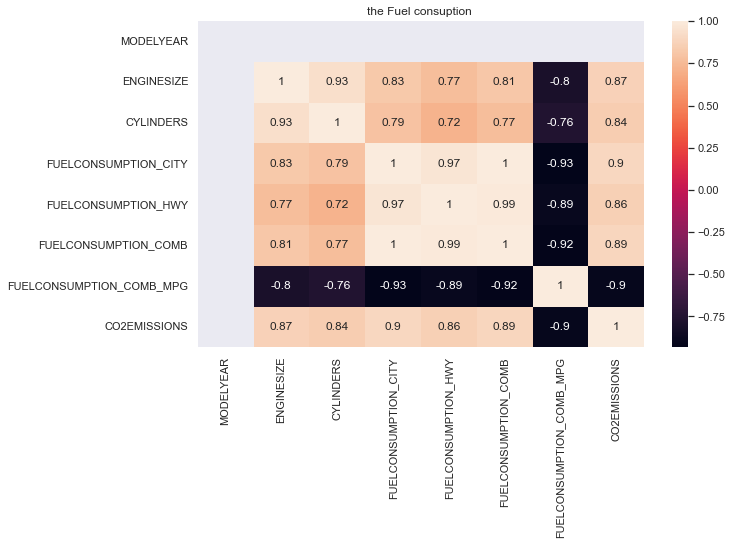

In [5]:
#Plot the Heat map 
plt.figure(figsize=(10,6))
plt.title("the Fuel consuption ")

sns.heatmap(data= Data_Fuel.corr(),annot= True)

<AxesSubplot:>

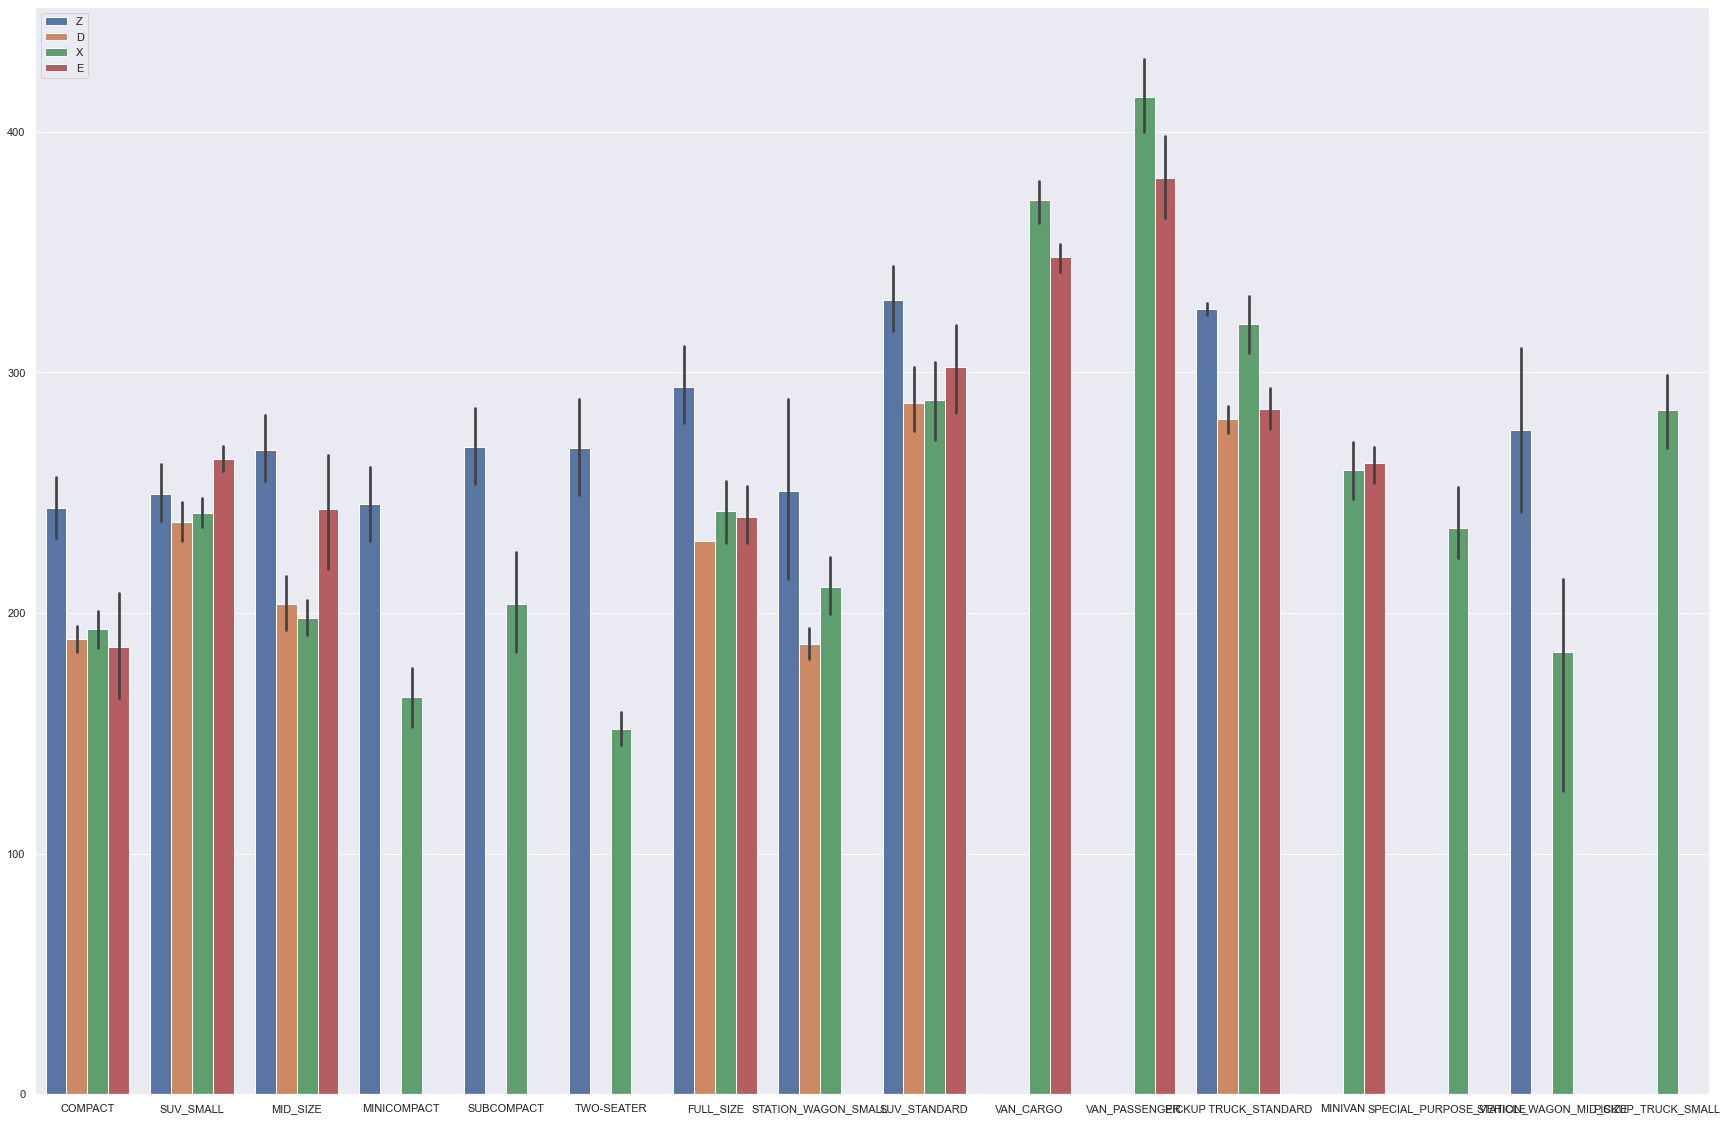

In [6]:
x = Data_Fuel[['CO2EMISSIONS','FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','TRANSMISSION','FUELTYPE','VEHICLECLASS','Brands']].values

plt.figure(figsize=(30,20))
sns.barplot(y= x[:,0],x= x[:,7],hue =x[:,6] )

<AxesSubplot:>

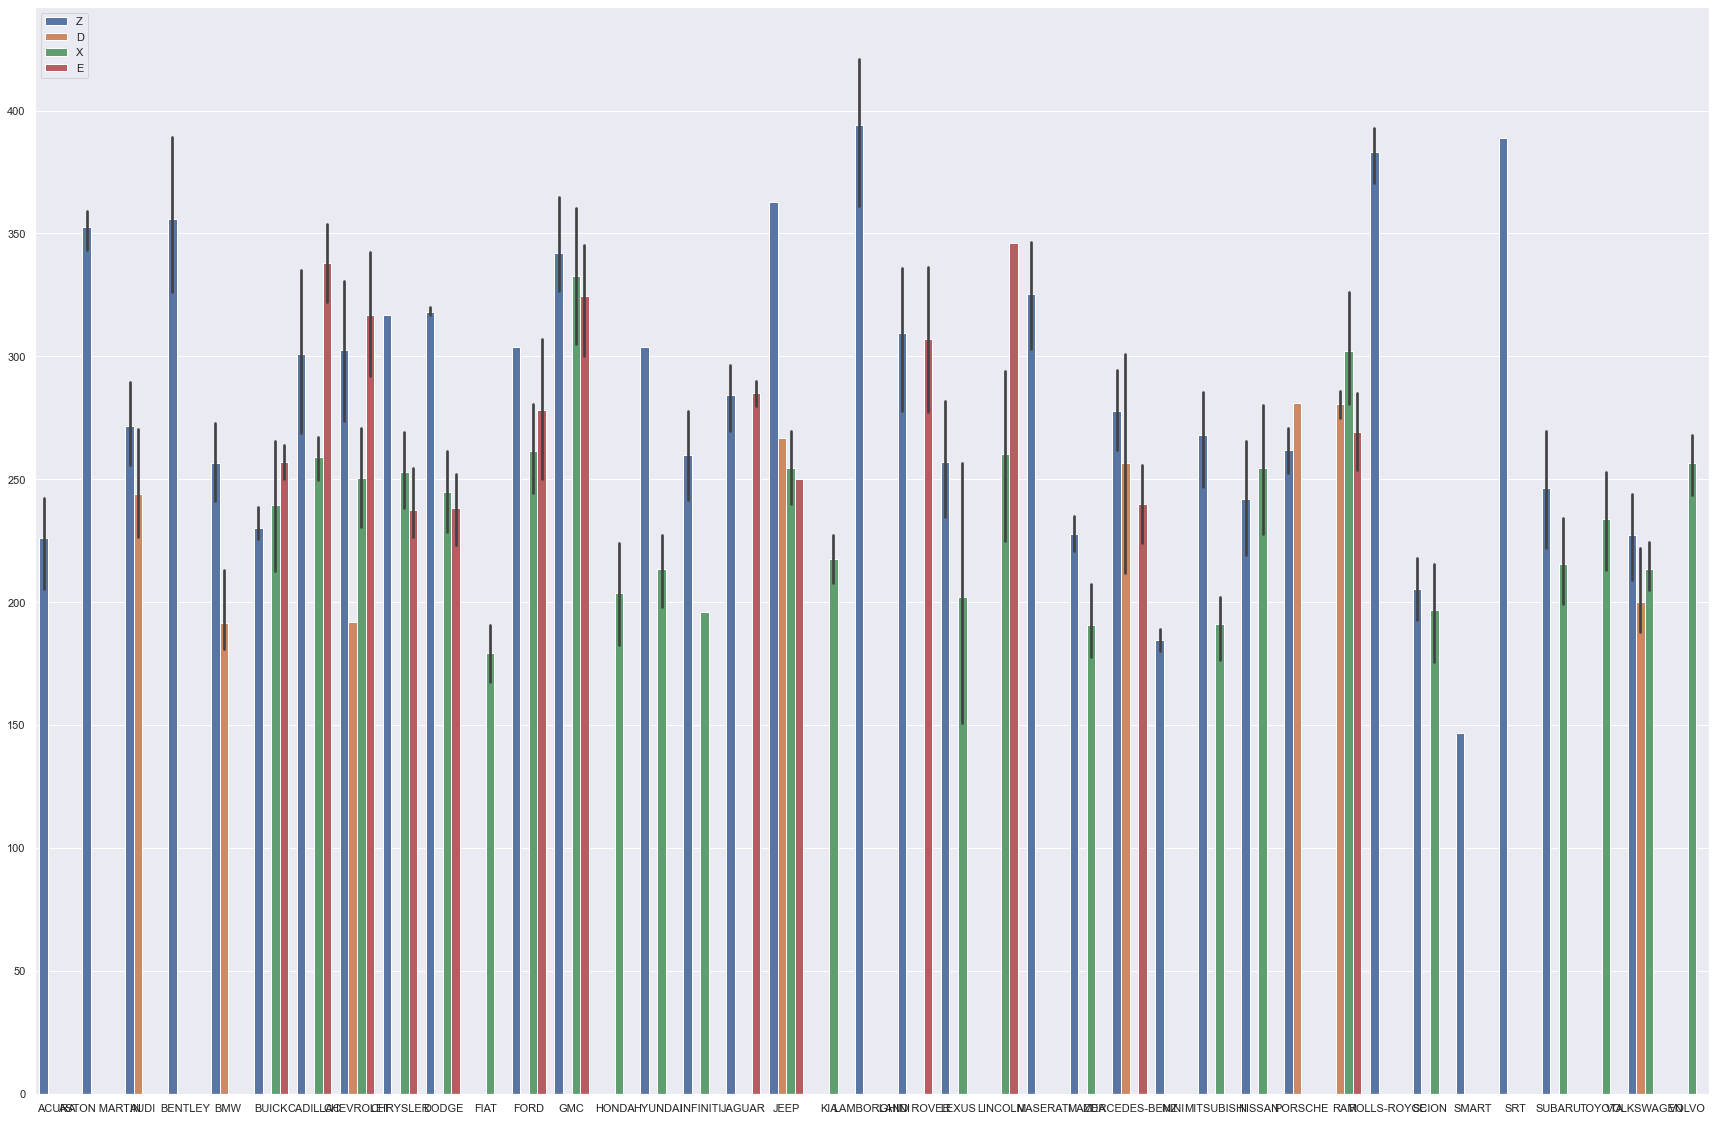

In [7]:
plt.figure(figsize=(30,20))
sns.barplot(y= x[:,0],x= x[:,8],hue =x[:,6] )

# Making the Histogram of : 
- CO2EMISSIONS
- FUELCONSUMPTION_COMB_MPG
- FUELCONSUMPTION_COMB
- FUELCONSUMPTION_HWY
- FUELCONSUMPTION_CITY
- TRANSMISSION


Text(0.5, 0, 'TRANSMISSION')

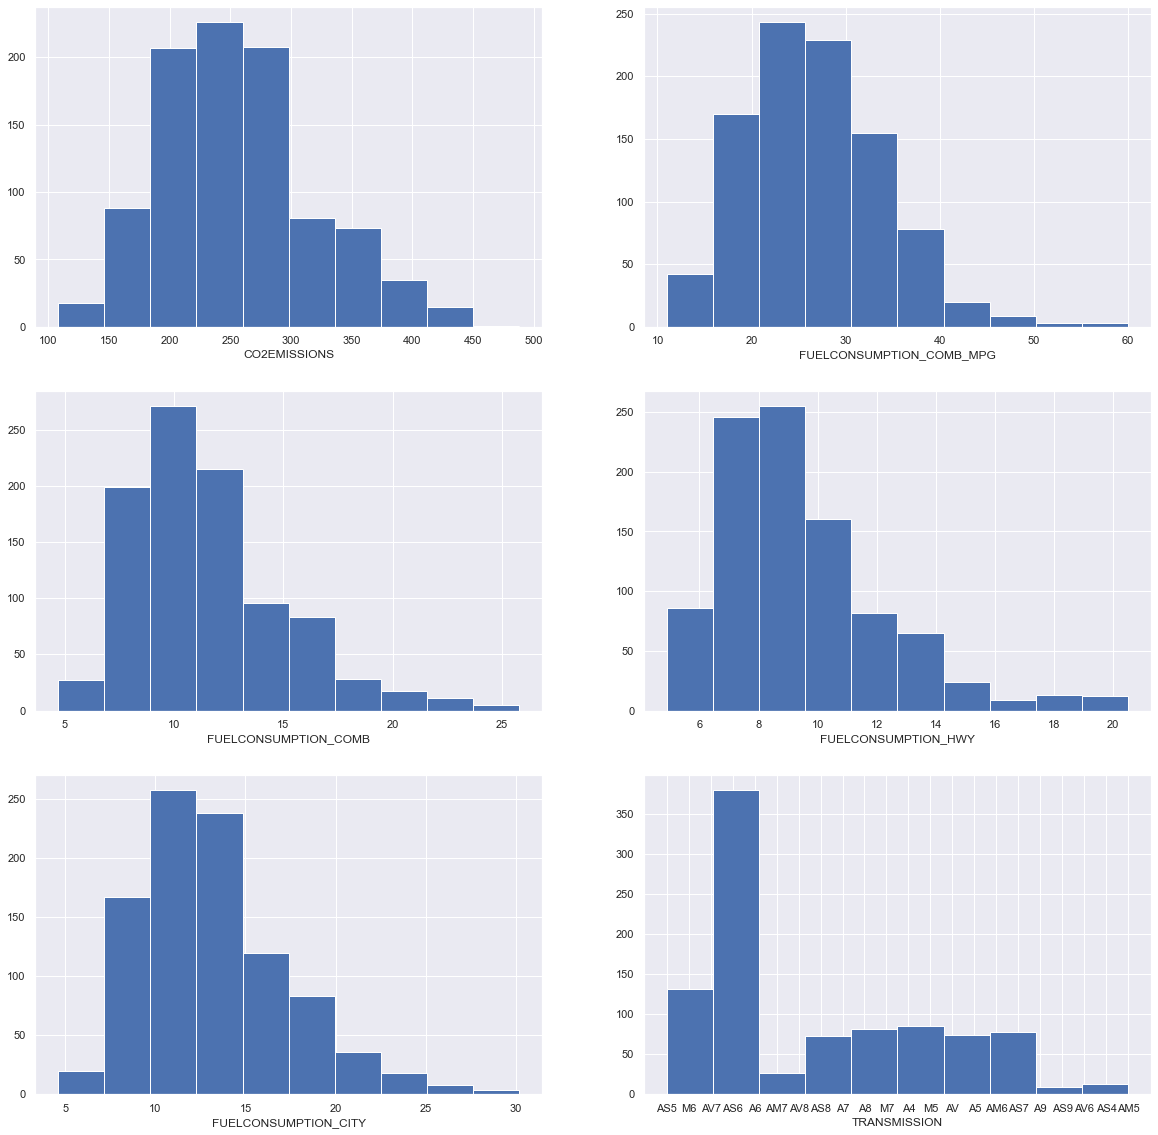

In [8]:
x = Data_Fuel[['CO2EMISSIONS','FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','TRANSMISSION']].values

fig , His = plt.subplots(3,2,figsize=(20,20))
His[0][0].hist(x[:,0])
His[0][0].set_xlabel('CO2EMISSIONS')

His[0][1].hist(x[:,1])
His[0][1].set_xlabel('FUELCONSUMPTION_COMB_MPG')

His[1][0].hist(x[:,2])
His[1][0].set_xlabel('FUELCONSUMPTION_COMB')

His[1][1].hist(x[:,3])
His[1][1].set_xlabel('FUELCONSUMPTION_HWY')

His[2][0].hist(x[:,4])
His[2][0].set_xlabel('FUELCONSUMPTION_CITY')

His[2][1].hist(x[:,5])
His[2][1].set_xlabel('TRANSMISSION')

In [9]:
#transform the string data to the numerical data 
from sklearn.preprocessing import LabelEncoder

Label_root = LabelEncoder()
Label1 = Label_root.fit_transform(Data_Fuel['Brands'])
Label2 =Label_root.fit_transform (Data_Fuel['VEHICLECLASS'])
Label3 = Label_root.fit_transform(Data_Fuel['TRANSMISSION'])
Label4 = Label_root.fit_transform(Data_Fuel['FUELTYPE'])


Data_Fuel['Brands'] = Label1
Data_Fuel['VEHICLECLASS'] = Label2
Data_Fuel['TRANSMISSION'] = Label3
Data_Fuel['FUELTYPE'] = Label4



<AxesSubplot:title={'center':'the Fuel consuption '}>

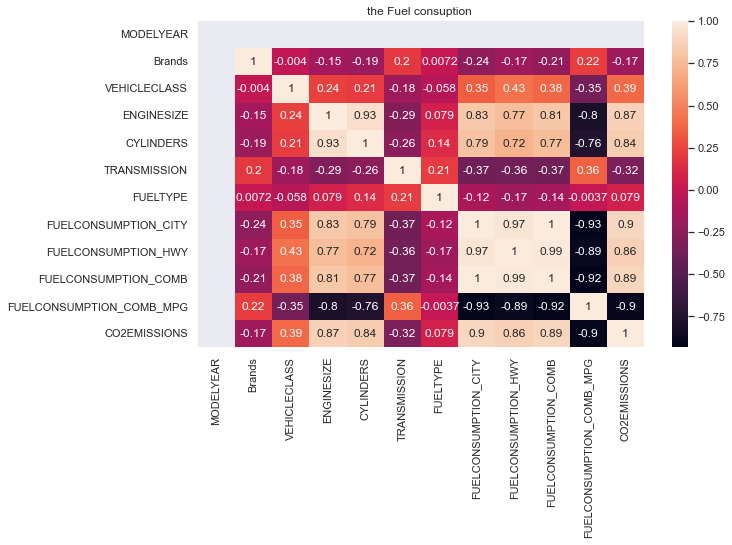

In [10]:
#Plot the Heat map 
plt.figure(figsize=(10,6))
plt.title("the Fuel consuption ")

sns.heatmap(data= Data_Fuel.corr(),annot= True)


In [11]:
#check how many years in the data set 
Data_Fuel['MODELYEAR'].unique()

array([2014], dtype=int64)

<AxesSubplot:title={'center':'FuelConsumption'}>

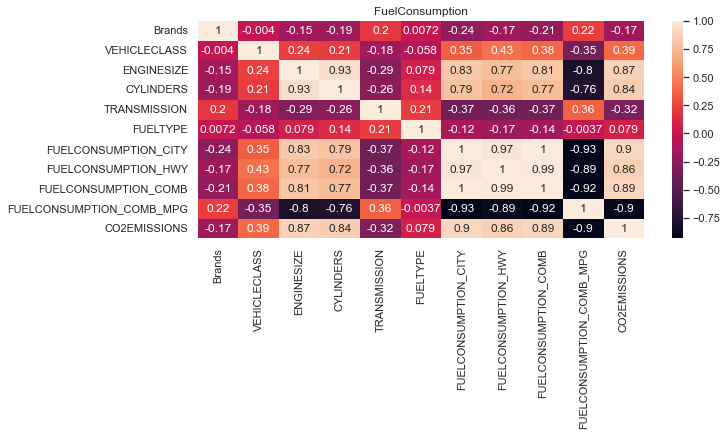

In [12]:
Data_Fuel.drop(columns='MODELYEAR',inplace=True)

plt.figure(figsize=(10,4))
plt.title ('FuelConsumption')
sns.heatmap(data=Data_Fuel.corr() , annot = True)

In [13]:
x= Data_Fuel[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']].values
y= Data_Fuel ['CO2EMISSIONS'].values

Text(0.5, 0, 'FUELCONSUMPTION_COMB_MPG')

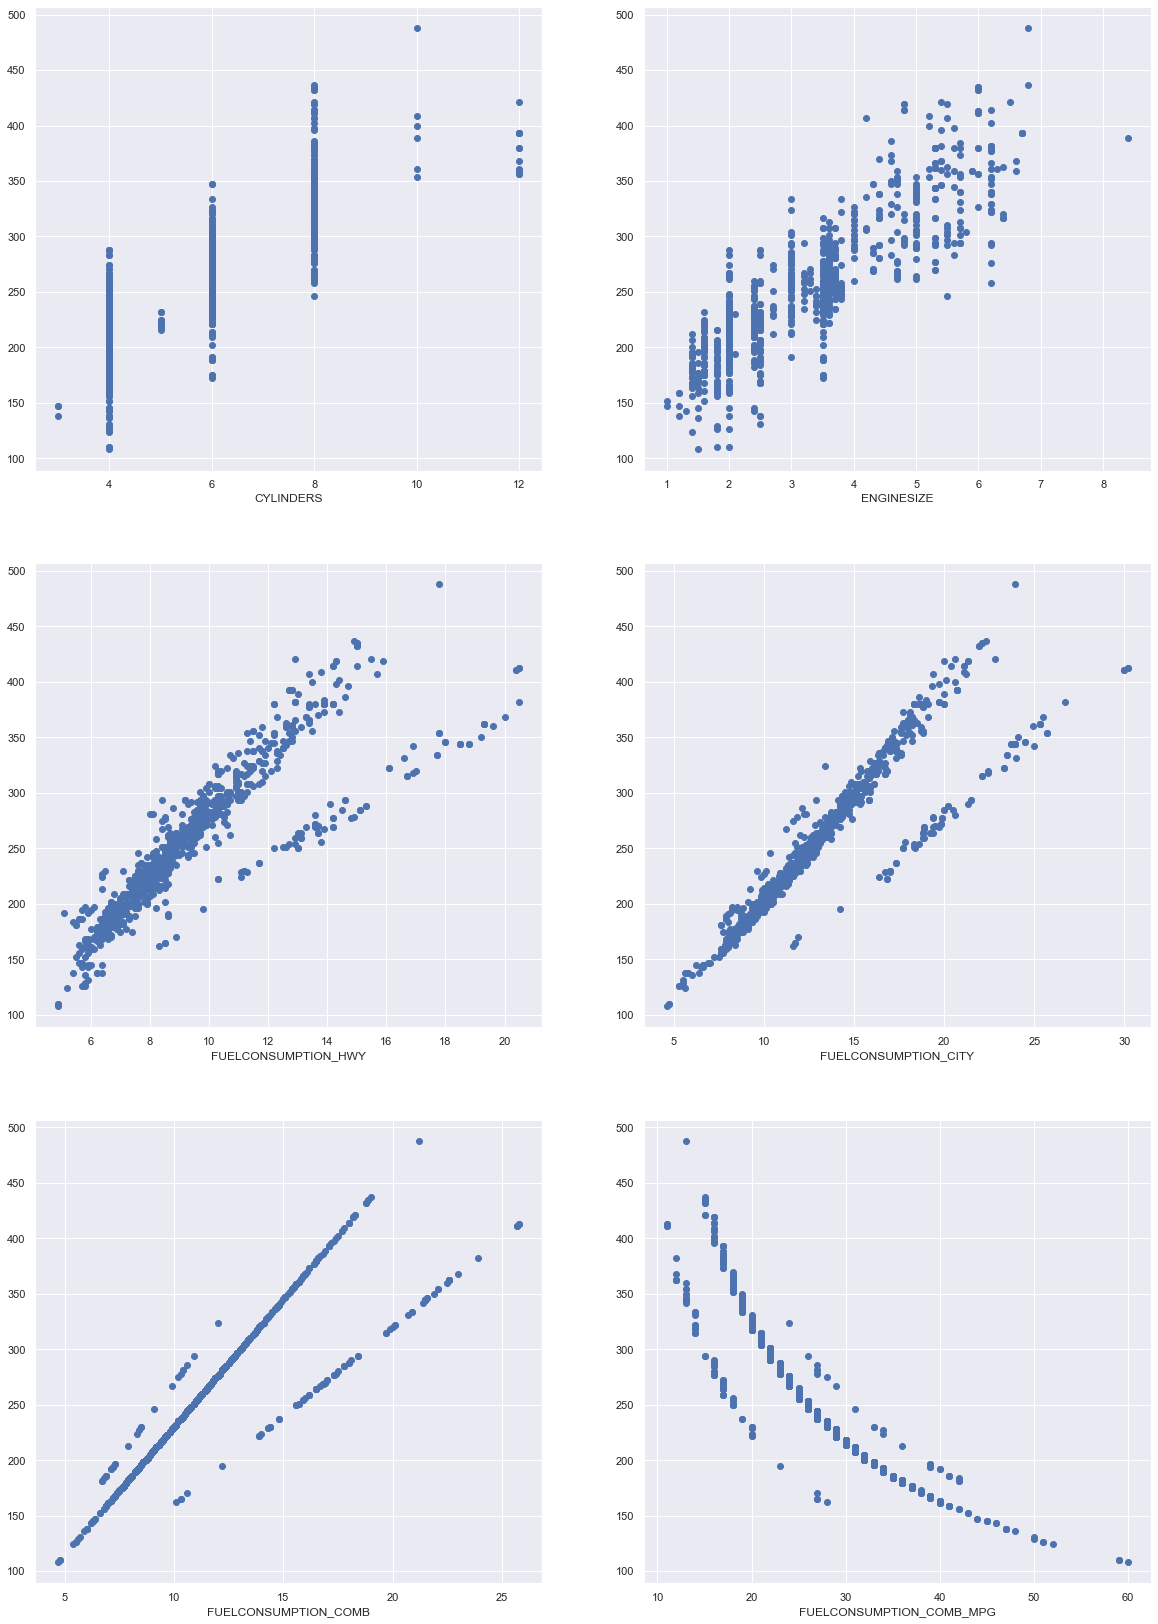

In [14]:
fig , Graph = plt.subplots(3,2,figsize = (20,29))
Graph[0][0].scatter(x[:,0],y)
Graph[0][0].set_xlabel ('CYLINDERS')

Graph[0][1].scatter(x[:,1],y)
Graph[0][1].set_xlabel ('ENGINESIZE')

Graph[1][0].scatter(x[:,2],y)
Graph[1][0].set_xlabel ('FUELCONSUMPTION_HWY')

Graph[1][1].scatter(x[:,3],y)
Graph[1][1].set_xlabel ('FUELCONSUMPTION_CITY')

Graph[2][0].scatter(x[:,4],y)
Graph[2][0].set_xlabel ('FUELCONSUMPTION_COMB')

Graph[2][1].scatter(x[:,5],y)
Graph[2][1].set_xlabel ('FUELCONSUMPTION_COMB_MPG')


# Conculsion 

- the brands and vechile class is less effiective on the feature in data set 
- ENGINESIZE ,FUELCONSUMPTION_COMB_MPG, FUELCONSUMPTION_COMB , FUELCONSUMPTION_HWY are the most effective on the Co2 emission 
- The Largest range co2 emission is between 200 and 300 
- The Largest range TRANSMISSION is between 200 and 300 
- The Largest range FUELCONSUMPTION_CITY is between 200 and 300 
- The Largest range FUELCONSUMPTION_COMB_MPG is between 200 and 300 
- co2 emission is reverse proportional with  FUELCONSUMPTION_COMB_MPG  (polynominal regression )
- co2 emission is dirct propotional with FUELCONSUMPTION_COMB ,FUELCONSUMPTION_CITY ,FUELCONSUMPTION_HWY ,CYLINDERS ,ENGINESIZE  (linear regression )

# Machine Learing  

In [15]:
from  sklearn  import linear_model 
from  sklearn.preprocessing import PolynomialFeatures

In [16]:
x= Data_Fuel[['FUELTYPE','CYLINDERS','ENGINESIZE','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','VEHICLECLASS','TRANSMISSION']].values
y= Data_Fuel ['CO2EMISSIONS'].values

In [17]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.model_selection import train_test_split 
from mlxtend.evaluate import bias_variance_decomp
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 


def Select_Best_Degree (x,y): 
    degr =1
    #train the model 
    p_poly = PolynomialFeatures (degree= degr)
    x_poly = p_poly.fit_transform(x)

    xtrain , xtest , ytrain ,ytest = train_test_split (x_poly,y,test_size=0.2 , random_state= 20)

    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(xtrain,ytrain)

    y_pred = linear_reg.predict(xtest)

    avg_lossPre , avg_biasPre , avg_varPre = bias_variance_decomp(linear_reg ,xtrain,ytrain,xtest,ytest ,loss='mse' ,random_seed=20 , num_rounds= 200)

    Prev_Diff = avg_biasPre - avg_varPre 

    print ("Degree : ",degr)
    print(f"Mean Square Error : {avg_lossPre}")
    print (f"Bias Error :  {avg_biasPre}")
    print (f"Variance is : {avg_varPre}")
    print ('-----------------------------------------------------------------------------------------------')

    while(True) :
        degr+=1  
        p_poly = PolynomialFeatures (degree= degr)
        x_poly = p_poly.fit_transform(x)
        xtrain , xtest , ytrain ,ytest = train_test_split (x_poly,y,test_size=0.2 , random_state= 1 )
        
        linear_reg = linear_model.LinearRegression()
        linear_reg.fit(xtrain,ytrain)

        y_pred = linear_reg.predict(xtest)

        avg_lossUp , avg_biasUp , avg_varUp = bias_variance_decomp(linear_reg ,xtrain,ytrain,xtest,ytest ,loss='mse' ,random_seed=20 , num_rounds= 200)

        Up_Diff = avg_biasUp - avg_varUp 

        print ("Degree : ",degr)
        print(f"Mean Square Error : {avg_lossUp}")
        print (f"Bias Error :  {avg_biasUp}")
        print (f"Variance is : {avg_varUp}")   
        print ('-----------------------------------------------------------------------------------------------')
        
        if (avg_lossUp<avg_lossPre) and (Up_Diff < Prev_Diff) :
            avg_lossPre = avg_lossUp
            Prev_Diff = Up_Diff
        else : 
            return degr-1




In [18]:

Best_Degree = Select_Best_Degree (x,y)
print (f"The best Degree is : {Best_Degree}")

Degree :  1
Mean Square Error : 437.2975070632258
Bias Error :  429.54782247235613
Variance is : 7.749684590870479
-----------------------------------------------------------------------------------------------
Degree :  2
Mean Square Error : 151.21379371622828
Bias Error :  107.47519264438735
Variance is : 43.73860107184099
-----------------------------------------------------------------------------------------------
Degree :  3
Mean Square Error : 10.489262552606913
Bias Error :  7.202431406613833
Variance is : 3.28683114599308
-----------------------------------------------------------------------------------------------
Degree :  4
Mean Square Error : 284.0547266871579
Bias Error :  4.591585204786175
Variance is : 279.46314148237167
-----------------------------------------------------------------------------------------------
The best Degree is : 3
